In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [130]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [131]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
train.shape

(42000, 785)

In [133]:
test.shape

(28000, 784)

In [134]:
num = np.array(train.iloc[3,1:]).reshape(28, 28)

In [135]:
num

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 220, 179,   6,   0,   0,   0,   0,
          0,   0,   0,   0,   9,  77,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

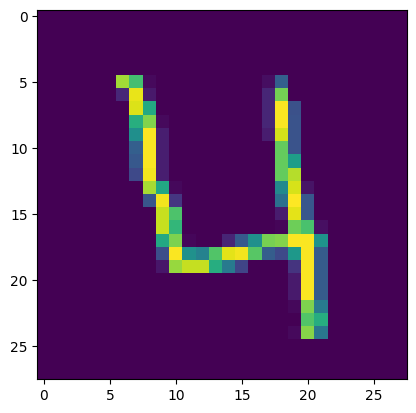

In [136]:
plt.imshow(num)
plt.show()

In [137]:
arr3 = train.iloc[3, 1:]

In [138]:
arr3

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 3, Length: 784, dtype: int64

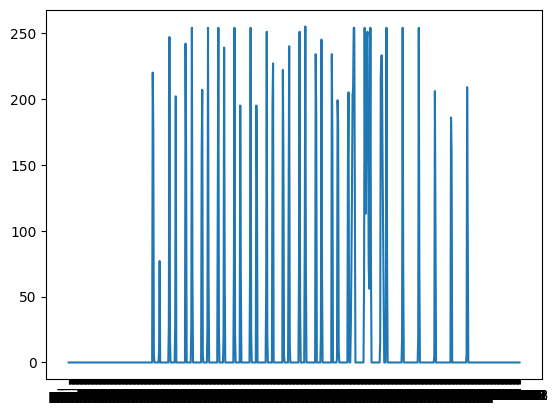

In [139]:
plt.plot(arr3)
plt.show()

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

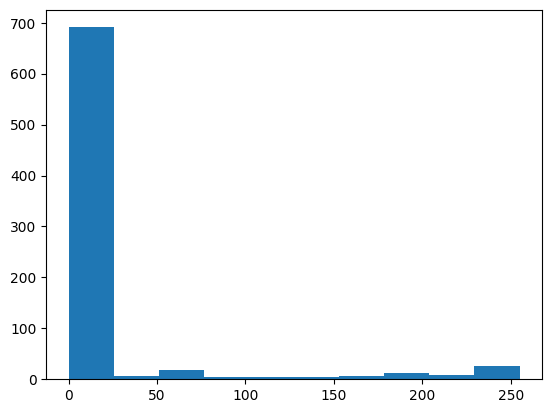

In [140]:
plt.hist(arr3)

In [141]:
max(arr3)

255

In [142]:
train.isnull()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [143]:
train.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [144]:
X = train.iloc[:, 1:].values  
Y = train.iloc[:, 0].values   

In [145]:
X = X / 255.0
test = test / 255.0

In [146]:
X = X.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [147]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

In [148]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [149]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [150]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val), batch_size=32)

Epoch 1/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.8268 - loss: 0.5339 - val_accuracy: 0.9786 - val_loss: 0.0714
Epoch 2/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9698 - loss: 0.0983 - val_accuracy: 0.9821 - val_loss: 0.0588
Epoch 3/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9793 - loss: 0.0667 - val_accuracy: 0.9864 - val_loss: 0.0456
Epoch 4/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9893 - loss: 0.0337 - val_accuracy: 0.9895 - val_loss: 0.0380
Epoch 8/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9896 - loss: 0.0314 - val_accuracy: 0.9898 - val_loss: 0.0380
Epoch 9/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9920 - loss: 0.0251 - val_accuracy: 0.9910 - val_loss: 0.0406
Epoch 10/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9923 - loss: 0.0237 - val_accuracy: 0.9895 - val_loss: 0.0376


In [151]:
val_loss, val_acc = model.evaluate(X_val, Y_val)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9888 - loss: 0.0413
Validation Accuracy: 98.95%


In [ ]:
predictions = np.argmax(model.predict(test), axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [ ]:
submission = pd.DataFrame({'ImageId': range(1, len(predictions) + 1), 'Label': predictions})
submission.to_csv('submission.csv', index=False)
print("Submission file saved!")

Submission file saved!


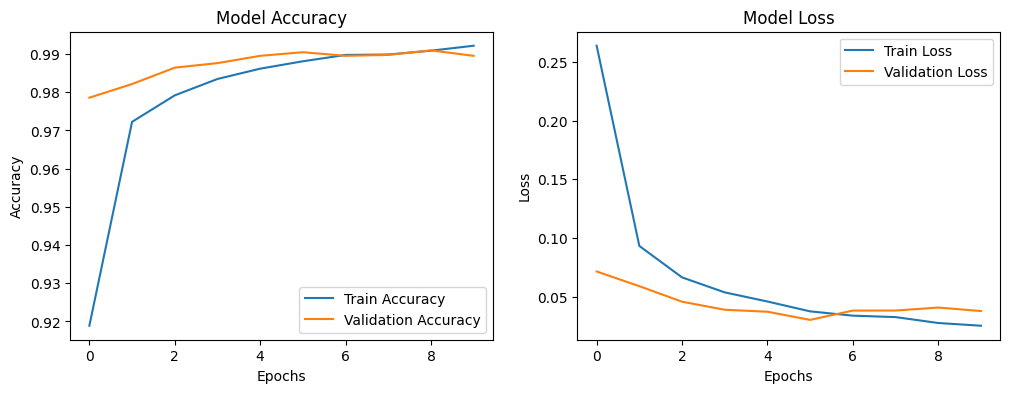

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


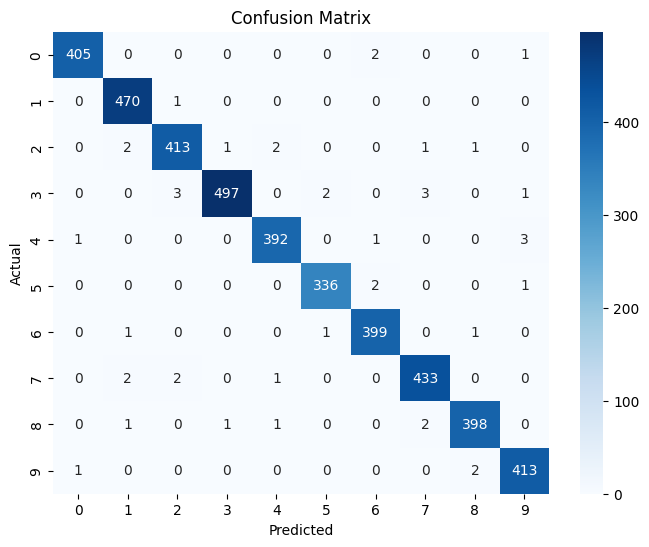

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       408
           1       0.99      1.00      0.99       471
           2       0.99      0.98      0.98       420
           3       1.00      0.98      0.99       506
           4       0.99      0.99      0.99       397
           5       0.99      0.99      0.99       339
           6       0.99      0.99      0.99       402
           7       0.99      0.99      0.99       438
           8       0.99      0.99      0.99       403
           9       0.99      0.99      0.99       416

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



In [162]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# Confusion Matrix
y_pred = np.argmax(model.predict(X_val), axis=1)
conf_matrix = confusion_matrix(Y_val, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(Y_val, y_pred))

In [163]:
x = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [164]:
x = x/255

In [165]:
x = x.reshape(-1, 28, 28, 1)

In [166]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)

In [167]:
datagen = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.1,     
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    shear_range=0.1       
)

datagen.fit(X_train)

In [168]:
new_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  
    Dense(10, activation='softmax')  
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [169]:
new_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [170]:
new_history = model.fit(datagen.flow(X_train, Y_train, batch_size=32),
                    validation_data=(X_val, Y_val),
                    epochs=15)

Epoch 1/15
   4/1182 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.8763 - loss: 0.5289  

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1182/1182 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.9305 - loss: 0.2436 - val_accuracy: 0.9888 - val_loss: 0.0324
Epoch 2/15
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.9672 - loss: 0.1107 - val_accuracy: 0.9905 - val_loss: 0.0272
Epoch 3/15
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.9755 - loss: 0.0841 - val_accuracy: 0.9910 - val_loss: 0.0315
Epoch 4/15
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.9713 - loss: 0.0929 - val_accuracy: 0.9929 - val_loss: 0.0268
Epoch 5/15
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.9778 - loss: 0.0756 - val_accuracy: 0.9919 - val_loss: 0.0238
Epoch 6/15
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.9796 - loss: 0.0718 - val_accuracy: 0.9902 - val_loss: 0.0281
Epoch 7/15
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.9799 - loss: 0.0702 - val_accuracy: 0.9893 - val_loss: 0.0320
Epoch 8/15
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.9810 - loss: 0.06

In [171]:
val_loss, val_acc = model.evaluate(X_val, Y_val)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9928 - loss: 0.0240
Validation Accuracy: 99.21%


In [172]:
submission = pd.DataFrame({'ImageId': range(1, len(predictions) + 1), 'Label': predictions})
submission.to_csv('newsubmission.csv', index=False)
print("Submission file saved!")

Submission file saved!


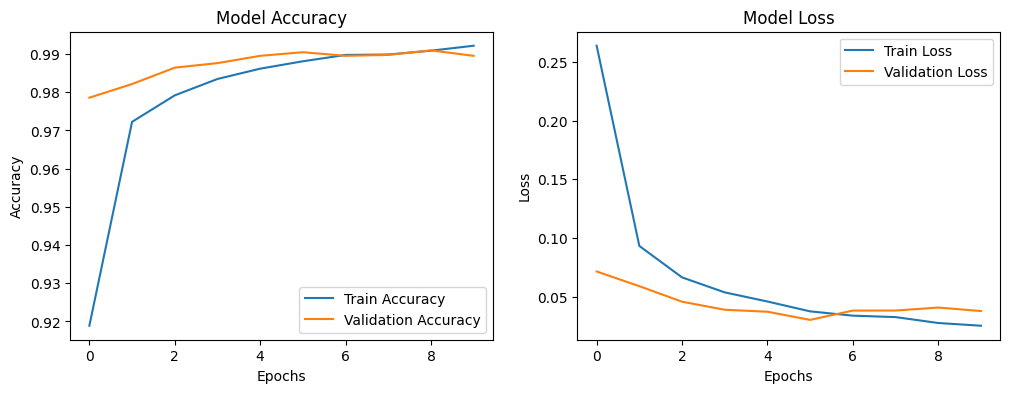

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


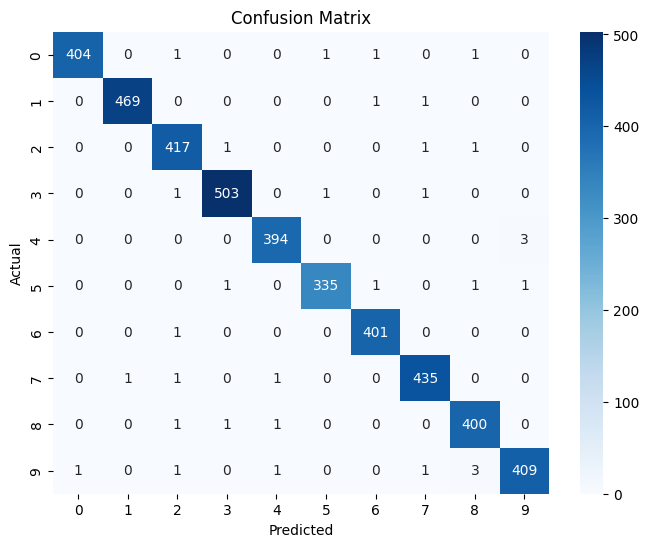

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       408
           1       1.00      1.00      1.00       471
           2       0.99      0.99      0.99       420
           3       0.99      0.99      0.99       506
           4       0.99      0.99      0.99       397
           5       0.99      0.99      0.99       339
           6       0.99      1.00      1.00       402
           7       0.99      0.99      0.99       438
           8       0.99      0.99      0.99       403
           9       0.99      0.98      0.99       416

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



In [173]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


y_pred = np.argmax(model.predict(X_val), axis=1)
conf_matrix = confusion_matrix(Y_val, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


print("Classification Report:\n", classification_report(Y_val, y_pred))